In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [19]:
def analyzer(max_depth):
    data = pd.read_csv('Social_Network_Ads.csv')
    X = data.iloc[:, 2:4].values
    y = data.iloc[:, -1].values
    
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    
    if X.shape[1] > 1:
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        step_size = 0.5  
        b = np.arange(start=y_min, stop=y_max, step=step_size)
        YY = np.arange(y_min, y_max, step_size)
    else:
        step_size = 0.5
        b = np.arange(start=x_min, stop=x_max, step=step_size)
        YY = np.arange(x_min, x_max, step_size)

    XX, YY = np.meshgrid(np.arange(x_min, x_max, step_size), YY)
    
    if X.shape[1] > 1:
        input_array = np.array([XX.ravel(), YY.ravel()]).T
    else:
        input_array = np.array([XX.ravel()]).T
    
    labels = clf.predict(input_array)
    
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()


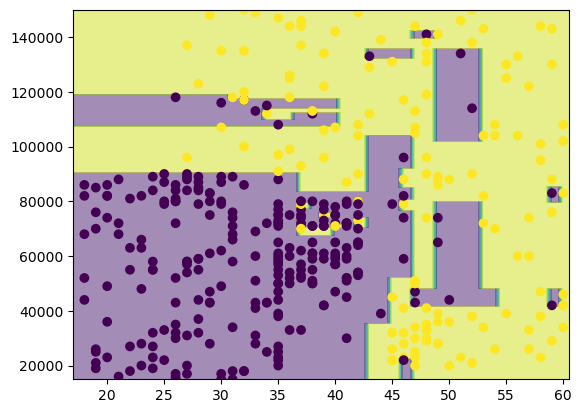

In [20]:
analyzer(max_depth=None)

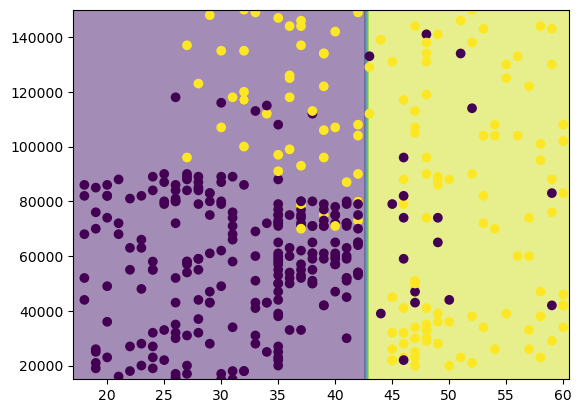

In [21]:
analyzer(max_depth=1)

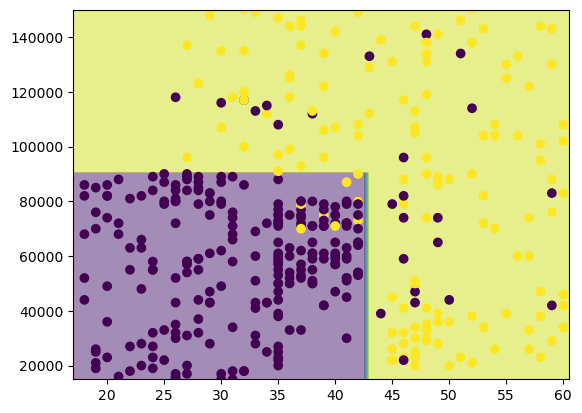

In [22]:
analyzer(max_depth=2)

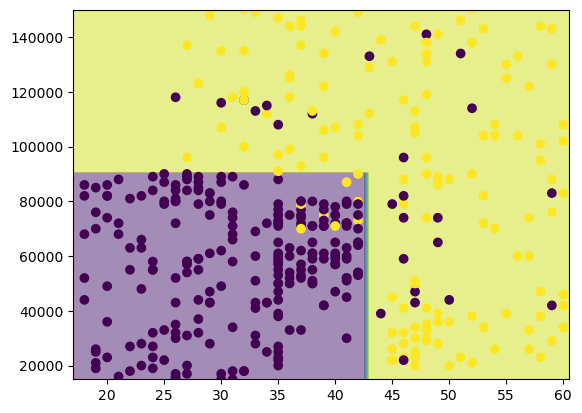

In [23]:
analyzer(max_depth=3)

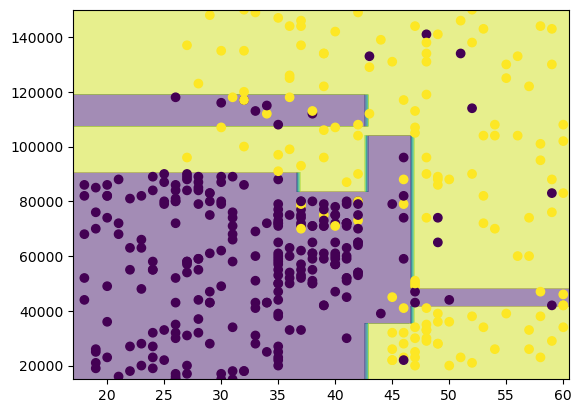

In [24]:
analyzer(max_depth=4)

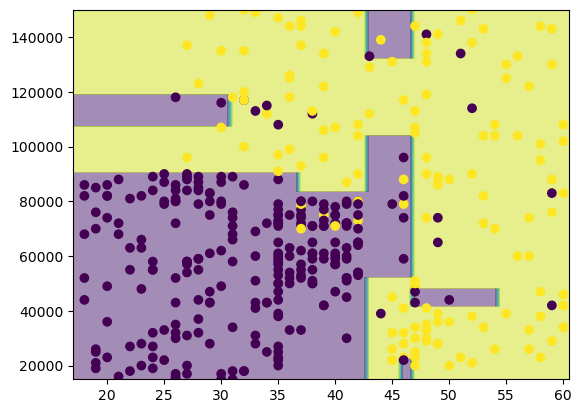

In [25]:
analyzer(max_depth=5)

##### DecisionTress have hyperparameters like :
##### 1)Criterion:- Here we need to specify that whether we will use gini impurity or entropy.Gini impurity is faster but sometimes entropy criteron works better.
##### 2)Max_depth =no of depth the tree must have.This paramter is most imp in case of decision tress.
##### 3)Splitter = When working on numerical column , we split the data and select the best one ...which is our splitter=best and we have another option i.e random ..to select any criteria or node to split the dataset.Random reduces the overfitting.
##### 4)Min_sample_split= This hyperparameter is used for controlling the splitting.When we set min_sample_split to any number, the splitting in decision tree will only happen if the next two splits i.e left and right subtree has that much amt of min_sample_split.
##### 5)Min_leaf_split =This paramter controls the samples in the leaf node of decision tree.Splitting only occurs when the current node has more than min_leaf_split.
##### 6)Max_features= This hyperparameter is used to set the maximum no of feature which we want to allow to the decision tree to use.This can be set when the dataset has large no of feature.
##### 7)Max_leaf_nodes=This is used to control the no of leaf nodes in decision tree.